# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group

df = load_data('output/q6_transformed_data.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [2]:
# Recreate site and intervention columns for grouping purposes
site_cols = [col for col in df.columns if col.startswith('site_')]
df['site'] = 'site a'
for col in site_cols:
    df.loc[df[col] == 1, 'site'] = col.replace('site_', '')

intervention_col = [col for col in df.columns if col.startswith('intervention_group_')]
df['intervention_group'] = "control"
for col in intervention_col:
    df.loc[df[col] == 1, 'intervention_group'] = col.replace('intervention_group_', '')

# Calculate mean age, BMI, and blood pressure per site
gb_site = df.groupby('site')[['age', 'bmi', 'systolic_bp', 'diastolic_bp']].agg('mean')
print(gb_site)

              age        bmi  systolic_bp  diastolic_bp
site                                                   
site a  56.364005  25.878687   117.341340     73.529432
site b  62.401957  25.718997   117.125561     73.298002
site c  57.312108  25.800241   117.937771     73.648336
site d  63.491006  25.588541   117.892738     73.604930
site e  57.064897  25.511504   117.481809     73.720747


In [3]:
# Count patients by intervention group
gb_intervention = df.groupby('intervention_group').agg('count')
print(gb_intervention)

                    patient_id   age   sex   bmi  enrollment_date  \
intervention_group                                                  
control                   3337  3337  3337  3337             3337   
treatment a               3321  3321  3321  3321             3321   
treatment b               3342  3342  3342  3342             3342   

                    systolic_bp  diastolic_bp  cholesterol_total  \
intervention_group                                                 
control                    3337          3337               3337   
treatment a                3321          3321               3321   
treatment b                3342          3342               3342   

                    cholesterol_hdl  cholesterol_ldl  ...  bp_category  \
intervention_group                                    ...                
control                        3337             3337  ...         3337   
treatment a                    3321             3321  ...         3321   
treatment b      

**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [4]:
# Use summarize_by_group utility
overall_stats = summarize_by_group(df, 'site')
print(overall_stats)

           age                                                            bmi  \
         count       mean         std    min   25%   50%   75%    max   count   
site                                                                            
site a  2956.0  56.364005  162.536292 -999.0  70.0  81.0  93.0  100.0  2956.0   
site b  2453.0  62.401957  139.050180 -999.0  69.0  80.0  92.0  100.0  2453.0   
site c  2073.0  57.312108  157.941868 -999.0  70.0  80.0  91.0  100.0  2073.0   
site d  1501.0  63.491006  136.140058 -999.0  70.0  80.0  92.0  100.0  1501.0   
site e  1017.0  57.064897  157.697644 -999.0  69.0  80.0  92.0  100.0  1017.0   

                   ... adherence_pct        cholesterol_ratio            \
             mean  ...           75%    max             count      mean   
site               ...                                                    
site a  25.878687  ...          73.0  100.0            2956.0  1.494966   
site b  25.718997  ...          72.0  100.0        

## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [5]:
# Multiple aggregations
multi_agg = summarize_by_group(df, 'site', agg_dict = {
    'age' : ['mean', 'std', 'min', 'max'],
    'bmi' : ['mean', 'std'],
    'systolic_bp' : ['mean', 'median']
})
display(multi_agg)

age                              bmi           systolic_bp  \
             mean         std  min  max       mean       std        mean   
site                                                                       
site a  56.364005  162.536292 -999  100  25.878687  4.912664  117.341340   
site b  62.401957  139.050180 -999  100  25.718997  4.911263  117.125561   
site c  57.312108  157.941868 -999  100  25.800241  5.278374  117.937771   
site d  63.491006  136.140058 -999  100  25.588541  5.725171  117.892738   
site e  57.064897  157.697644 -999  100  25.511504  5.878845  117.481809   

               
       median  
site           
site a  117.0  
site b  117.0  
site c  117.0  
site d  117.0  
site e  117.0

## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [6]:
# Standardize outcome_cvd and get mean by intervention group
df['outcome_cvd'] = df['outcome_cvd'].replace(['No', 'no'], 0)
df['outcome_cvd'] = df['outcome_cvd'].replace(['Yes', 'yes'], 1)
mean_cvd = df.groupby('intervention_group')['outcome_cvd'].agg('mean')
print(f"Mean outcome cvd rate by intervention group\n{mean_cvd}")

# Get adherence_pct by intervention group
mean_adherence = df.groupby('intervention_group')['adherence_pct'].agg('mean')
print(f"Mean adherence percentage by intervention group\n{mean_adherence}")

# Create cross-tabulation of intervention_group vs dropout status
crosstab = df.pivot_table(
    index = 'dropout',
    columns = 'intervention_group',
    aggfunc = 'size',
    fill_value = 0
)
print(f"Cross-tabulation of intervention group vs dropout status\n{crosstab}")

# Output adverse events per intervention group
adverse_events = df.groupby('intervention_group')['adverse_events'].agg('sum')
print(f'Number of adverse events per group\n{adverse_events}')

Mean outcome cvd rate by intervention group
intervention_group
control        0.336530
treatment a    0.319482
treatment b    0.333633
Name: outcome_cvd, dtype: float64
Mean adherence percentage by intervention group
intervention_group
control        60.830686
treatment a    60.474255
treatment b    61.149013
Name: adherence_pct, dtype: float64
Cross-tabulation of intervention group vs dropout status
intervention_group  control  treatment a  treatment b
dropout                                              
no                     2831         2831         2871
yes                     506          490          471
Number of adverse events per group
intervention_group
control        230
treatment a    628
treatment b    597
Name: adverse_events, dtype: int64


/var/folders/q2/425x2zhd1b3f3hnjp4v223880000gn/T/ipykernel_28537/2136776289.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['outcome_cvd'] = df['outcome_cvd'].replace(['Yes', 'yes'], 1)


Mean dropout rate by intervention group
intervention_group
control        0.151633
treatment a    0.147546
treatment b    0.140934
Name: dropout, dtype: float64


/var/folders/q2/425x2zhd1b3f3hnjp4v223880000gn/T/ipykernel_28537/4243286913.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['dropout'] = df['dropout'].replace(['no', 'yes'], [0, 1])


(0.0, 1.0)

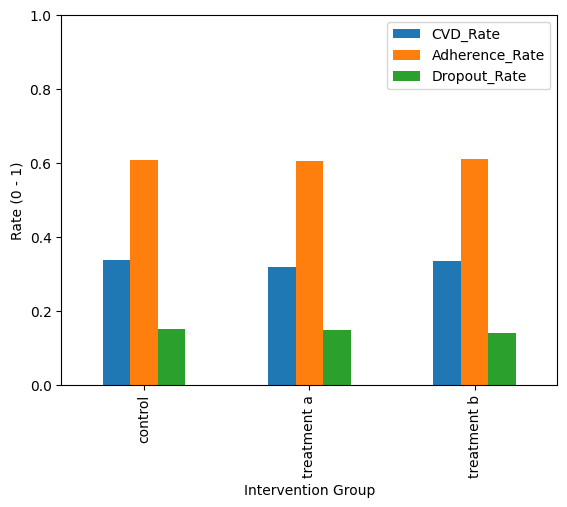

In [7]:
# Get dropout rate
df['dropout'] = df['dropout'].replace(['no', 'yes'], [0, 1])
mean_dropout = df.groupby('intervention_group')['dropout'].agg('mean')
print(f"Mean dropout rate by intervention group\n{mean_dropout}")

# Convert adherence to decimal
mean_adherence = mean_adherence / 100

# Visualize and compare desired rates
comparison_df = pd.DataFrame({
    'CVD_Rate' : mean_cvd,
    'Adherence_Rate' : mean_adherence,
    'Dropout_Rate' : mean_dropout
})
comparison_df.plot(kind = 'bar')
plt.xlabel("Intervention Group")
plt.ylabel('Rate (0 - 1)')
plt.ylim(0, 1)

## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [8]:
# Optional advanced analysis

# Top 10 patients by cholesterol_total
print(f"Top 10 patients by cholesterol total\n{df.sort_values('cholesterol_total', ascending = False).head(10)}")

# Summarize by age group
print(f"Calculate statistics by age group\n{summarize_by_group(df, 'age_group')}")


Top 10 patients by cholesterol total
     patient_id  age     sex   bmi enrollment_date  systolic_bp  diastolic_bp  \
6808     p06809   78  female  32.6      2023-02-28        128.0          64.0   
5703     p05704   98  female  33.0      2023-04-24        144.0          86.0   
2748     p02749   83    male  24.4      2022-10-27        131.0          85.0   
9534     p09535   56  female  30.3      2022-05-13        117.0          71.0   
1670     p01671   58  female  29.2      2023-09-16        145.0          93.0   
1636     p01637   65    male  24.5      2023-10-15        128.0          73.0   
9660     p09661 -999  female  35.4      2023-05-21        146.0          92.0   
1830     p01831   65    male  27.6      2023-05-16        129.0          86.0   
9522     p09523   78  female  35.4      2022-05-01        167.0         106.0   
5478     p05479   85  female  31.5      2023-05-10        119.0          70.0   

      cholesterol_total  cholesterol_hdl  cholesterol_ldl  ...  age_gro

Calculate statistics by age group
              age                                                        bmi  \
            count       mean       std   min   25%   50%   75%   max   count   
age_group                                                                      
40-54       211.0  51.341232  2.586992  43.0  50.0  52.0  53.0  54.0   211.0   
55-69      2050.0  63.591707  3.959240  55.0  61.0  64.0  67.0  69.0  2050.0   
70+        6050.0  82.897686  8.115891  70.0  76.0  82.0  89.0  99.0  6050.0   

                      ... dropout      cholesterol_ratio                      \
                mean  ...     75%  max             count      mean       std   
age_group             ...                                                      
40-54      25.822749  ...     0.0  1.0             211.0  1.479870  0.716696   
55-69      25.668000  ...     0.0  1.0            2050.0  1.492887  0.722465   
70+        25.738000  ...     0.0  1.0            6050.0  1.491301  0.723310   

    

In [9]:
# Get desired summary statistics for each site
site_summary = df.groupby('site').agg({
    'age' : 'mean',
    'bmi': 'mean',
    'patient_id': 'count'
}).rename(columns = {'patient_id' : 'patient count'})

# Get desired intervention group comparison metrics
intervention_comparison = pd.DataFrame({
    'CVD_Rate' : mean_cvd,
    'Adherence_Rate' : mean_adherence,
    'Dropout_Rate' : mean_dropout,
    'Averse_Events' : adverse_events
})

# Save csv and output key findings
site_summary.to_csv('output/q7_site_summary.csv')
intervention_comparison.to_csv('output/q7_intervention_comparison.csv')
with open('output/q7_analysis_report.txt', 'w') as file:
    file.write('Analysis Report\n\n')
    file.write('Finding 1: Patients in Treatment A had the lowest cardiovascular disease rate (31.9%).\n')
    file.write('Finding 2: Patients in Treatment A had the highest number of adverse events (628).\n')
    file.write('Finding 3: Patients in Treatment B had the highest adherence rate (61.1%).')

## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. Patients in Treatment A had the lowest cardiovascular disease rate (31.9%). 
2. Patients in Treatment A had the highest number of adverse events (628).
3. Patients in Treatment B had the highest adherence rate (61.1%).